<h1>Сборный проект интернет-магазин компьютерных игр <span class="tocSkip"></span></h1>

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

## Ознакомление с данными и их обработка


In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#import seaborn as sns
from scipy import stats as st

import os

In [2]:
# загрузка данных
if os.path.exists('/datasets/games.csv'):
    games = pd.read_csv('/datasets/games.csv')
else:
    games = pd.read_csv('/Users/olesya/datasets/games.csv')


In [3]:
# изучение таблиц
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод</b>

В таблице представлены данные о продажах компьютерных игр в разных частях мира. Состоит из 11 колонок и 16715 строк.

В столбцах <b>Name, Year_of_Release, Critic_Score, User_Score и Rating</b> имеются пропуски, которые необходимо обработать. Также для удобства необходимо привести названия столбцов к нижнему регистру. Удалить лишние пропуски и заменить тип данных в столбцах, где это необходимо.


## Обработка и подготовка данных

Заменим названия столбцов (приведём к нижнему регистру)

In [6]:
# перевод названий столбцов к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# подсчёт пропусков в столбцах
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Так как в столбце <b>name</b> всего два пропуска и их мы никак обработать не сможем, просто удалим эти строки. 


In [8]:
# удаление строк с пустыми значениями в столбце 'name' с восстановлением индексов
games.dropna(subset = ['name'], inplace = True)
games = games.reset_index(drop=True)
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Поскольку пропусков в столбце <b>year_of_release</b> всего 269 и это меньше 2% от всех данных, поэтому их просто удалим. А тип данных сразу переведем в целые.


In [9]:
# удаление строк с пустыми значениями в столбце 'year_of_release' с восстановлением индексов
games.dropna(subset = ['year_of_release'], inplace = True)
games = games.reset_index(drop=True)

# замена типа данных на int
games.year_of_release = games.year_of_release.astype('int32')

# проверка пропусков
games['year_of_release'].isna().sum()

0

Для того, чтобы изменить тип данных столбца <b>user_score</b> нужно заменить все пропуски на нетипичное значение -1, а также избавиться от значения tbd (to be determined), что означает, что для этих наблюдений оценка пользователей еще не определена. tbd также заменим на -1, и будем учитывать это при дальнейших рассчетах.

In [10]:
# замена пропусков и значений tbd на -1
games['user_score'] = games['user_score'].replace('tbd', -1).fillna(-1)

In [11]:
# замена типа данных на float
games.user_score = games.user_score.astype('float64')

Сделаем то же самое с пропусками в <b>critic_score</b>, а затем будем учитывать это в дальнейшей работе. Это поможет нам сохранить данные и не повлиять на результаты исследования.

In [12]:
# замена пропусков на -1
games['critic_score'] = games['critic_score'].fillna(-1)

In [13]:
# замена типа данных на int
games.critic_score = games.critic_score.astype('int32')

Пропуски в столбцах <b>critic_score и user_score</b> (также как и в <b>year_of_release и rating</b>) могли появиться по разным причинам. Можно заметить, что у старших версий платформ отсутствует рейтинг и оценка критиков/пользователей. Возможно, что раньше эти данные просто не собирали. Но пропуски есть и у относительно новых платформ. Здесь могли сыграть роль баги системы, ошибки при выгрузке данных, человеческий фактор и другие.

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN,31.38


In [15]:
# проверка таблицы после обработки
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


<b>Вывод</b>

Итак, пропуски обработали и изменили типы данных, где было возможным. Также посчитали суммарные продажи во всех регионах и добавили их в отдельный столбец. 

## Исследовательский анализ данных 

#### - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 

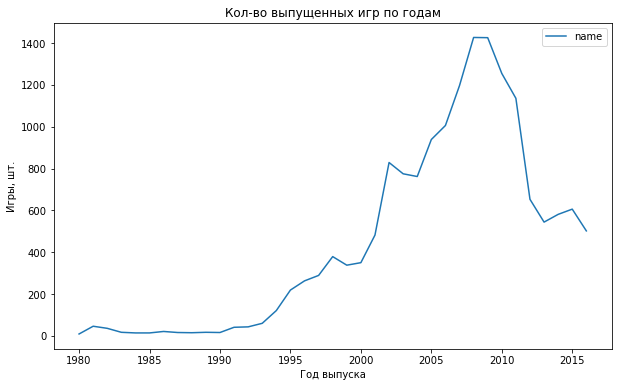

In [16]:
# вывод диаграммы по количеству выпущенных игр за весь период
count_by_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
count_by_year.plot(figsize=(10, 6), title='Кол-во выпущенных игр по годам')
plt.ylabel('Игры, шт.')
plt.xlabel('Год выпуска');

Видим, что до 1995 года игры особо не выпускались. Резкий скачок начался с 2000 года, видимо из-за доступности персональных компьютеров для большинства людей. Пик по выпуску игр приходится на 2007-2010 гг, далее идёт на спад.

#### - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

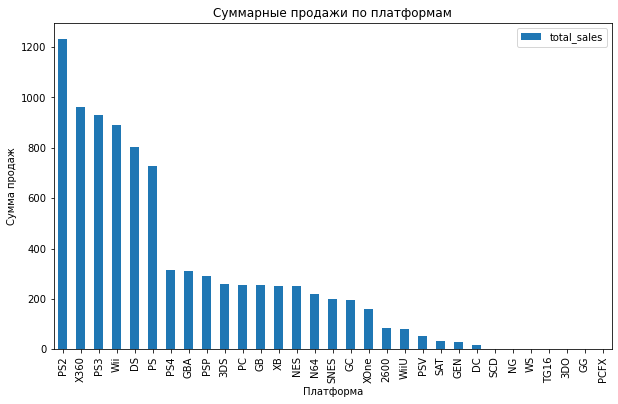

In [17]:
# вывод графика суммы продаж по каждой платформе
sales_by_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_by_platform.plot(kind='bar', figsize=(10, 6), title='Суммарные продажи по платформам')
plt.ylabel('Сумма продаж')
plt.xlabel('Платформа');

Несомненным лидером является платфома PS2, также наиболее популярные X360, PS3 и Wii.

In [18]:
# вывод топ 10 платформ с наибольшими продажами за весь период
display(sales_by_platform.sort_values(by='total_sales', ascending=False).head(10))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [19]:
# создание функции построения графика продаж игр выбранонной платформы за весь период c 1995 года
def create_plot(platforms):
    for platform in platforms:
        df = games.query('platform == @platform & year_of_release >= 1995' )
        df.groupby('year_of_release')['total_sales'].sum().plot(figsize=(10, 6), label=platform, legend=True)    
        plt.title('Продажи игр популярных платформ по годам')
        plt.ylabel('Сумма выручки')
        plt.xlabel('Год выпуска')
        

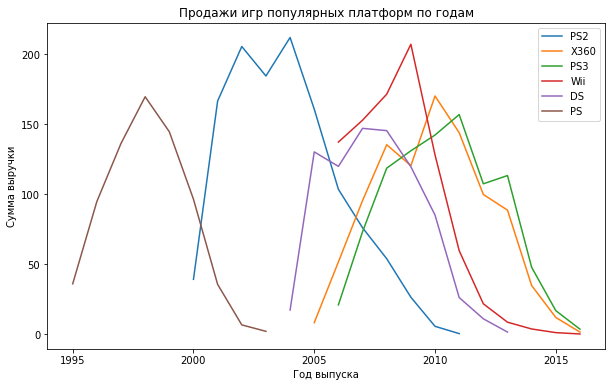

In [20]:
# вывод аналитики продаж игр по 6 платформам за весь период
create_plot(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])

Исходя из графика видим, что средняя продолжительность существования платформы составляет около 10 лет. Возможно она бы и сущетсвовала бы и больше, если бы не появлялись новые версии платформ. Но так как техничекий прогресс не стоит на месте, это невозможно, что вполне объяснимо.

#### - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. 

Для построения прогноза на 2017 год, возьмём данные с 2011 по 2016 гг. Это период, когда вышли наиболее популярные платформы. Остальные отбросим.

In [21]:
# вывод топ 10 платформ по проджам за период 2013-2016 гг
games_new = games.query('year_of_release >= 2012')
top_10 = games_new.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_10 = top_10.sort_values(by='total_sales', ascending=False).head(10)
display(top_10)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [22]:
# создание функции построения графика продаж игр всех платформ за период с 2012 года
def create_plot_new(platforms):
   
    for platform in platforms:
        df = games_new.query('platform == @platform')
        df.groupby('year_of_release')['total_sales'].sum().plot(figsize=(10, 8), label=platform, legend=True)    
        plt.title('Продажи игр популярных платформ по годам')        
        plt.ylabel('Сумма выручки')
        plt.xlabel('Год выпуска')
    

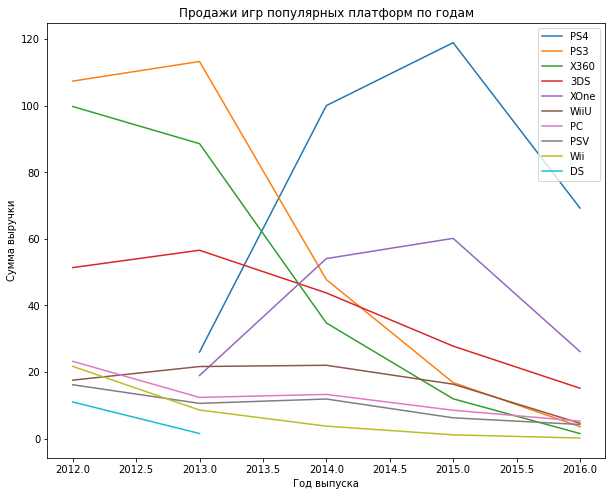

In [23]:
# вывод аналитики продаж игр по всем платформам за период с 2012 года
top_platforms = top_10.index
create_plot_new(top_platforms)

Как видим на конец 2016 года по продажам лидируют платформы: PS4, XOne, 3DS. Причем, количество продаж игр, выпущенных на каждую из этих платформ, снижается. 

Таким образом, можно сделать вывод, что индустрия игр по всем платформам угасает.

#### - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. 

In [24]:
# топ платформ по продажам игр в период 2012-2016 гг
games_top_platforms = games_new.query('platform in @top_platforms')

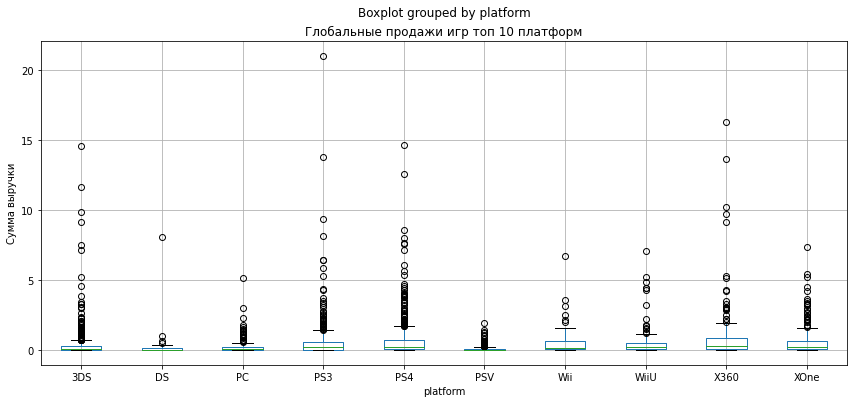

In [25]:
# распределение продаж топ 10 платформ 
games_top_platforms.boxplot(column='total_sales', by='platform', figsize=(14,6))
#plt.ylim(0,1.5)
plt.title('Глобальные продажи игр топ 10 платформ')
plt.ylabel('Сумма выручки');

Очень сильный разброс, в среднем продажи не превышают 5 млн, но есть и продажи по 40 и 80 млн. Посмотрим поближе.

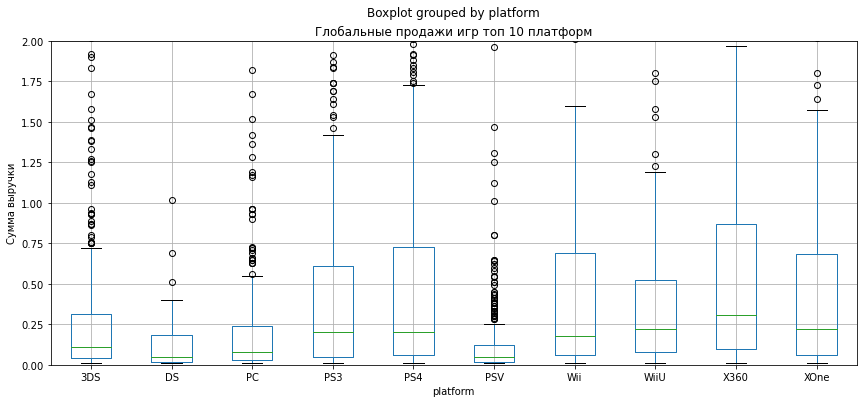

In [26]:
# распределение продаж топ 10 платформ 
games_top_platforms.boxplot(column='total_sales', by='platform', figsize=(14,6))
plt.ylim(0,2)
plt.title('Глобальные продажи игр топ 10 платформ')
plt.ylabel('Сумма выручки');

Наиболее прибыльные по продажам игры на платформах PS4, X360 и Wii. Медиана у них варьируется от 0,2 до 0,3 млн долларов.
Верхняя граница предела, за которыми уже определяются аномалии, на уровне 1,7 млн долларов.
У остальных - от 0,5 до 1,2 миллионов долларов.
Среди всех выделяется PSV, у него эти показатели сильно ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,25 млн.

#### - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. 


Рассмотрим платформу X360. Она давно на рынке, по ней много данных, при этом даже на конец 2016 года она является одной из самых популярных игровых платформ.

In [27]:
# фильтр таблицы по платформе x360 с рейтингом critic_score и user_score > 0
platform_x360 = games_top_platforms[(games_top_platforms['platform'] == "X360") & (games_top_platforms['critic_score'] > 0) & (games_top_platforms['user_score'] > 0)]


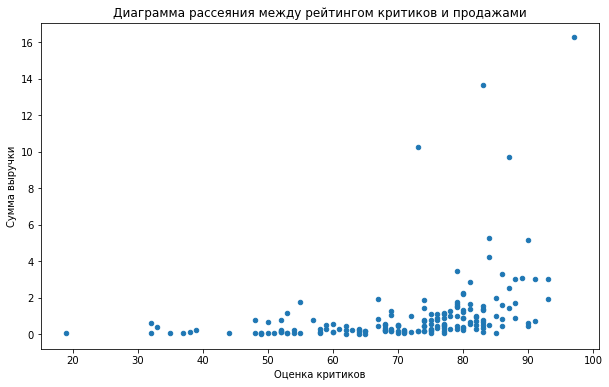

In [28]:
# диаграмма рассеяния
platform_x360.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 6))
plt.title('Диаграмма рассеяния между рейтингом критиков и продажами')
plt.ylabel('Сумма выручки')
plt.xlabel('Оценка критиков');

In [29]:
platform_x360['total_sales'].corr(platform_x360['critic_score'])

0.36057348885073365

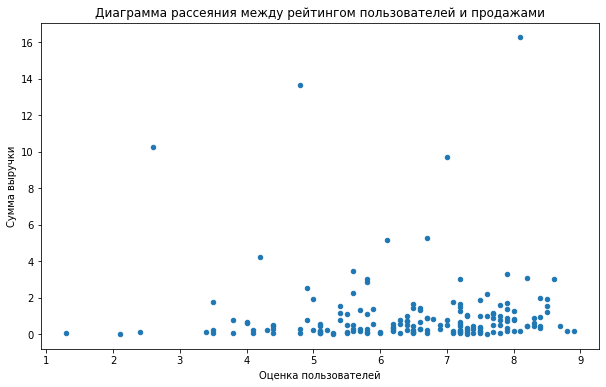

In [30]:
# диаграмма рассеяния
platform_x360.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 6))
plt.title('Диаграмма рассеяния между рейтингом пользователей и продажами')
plt.ylabel('Сумма выручки')
plt.xlabel('Оценка пользователей');

In [31]:
platform_x360['total_sales'].corr(platform_x360['user_score'])

-0.0020140394826897853

По диаграмме и корреляции видим, что на конечную стоимость больше всего влияет оценка критиков. Чем выше оценка критиков, тем больше выручки приносят продажи игр. Больше всего выручка при оценке критиков 70 и выше.

Оценка пользователей тоже влияет на продажи игр, но в значительно меньшей степени, чем оценка критиков. Видимо прежде, чем купить игру, покупатели больше доверяют критикам, чем пользователям, полагаясь на их опыт.

#### Соотнесите выводы с продажами игр на других платформах. 

In [32]:
# фильтр таблицы топ 10 платформ с рейтингом critic_score и user_score > 0
games_top_platforms = games_top_platforms[(games_top_platforms['critic_score'] > 0) & (games_top_platforms['user_score'] > 0)]


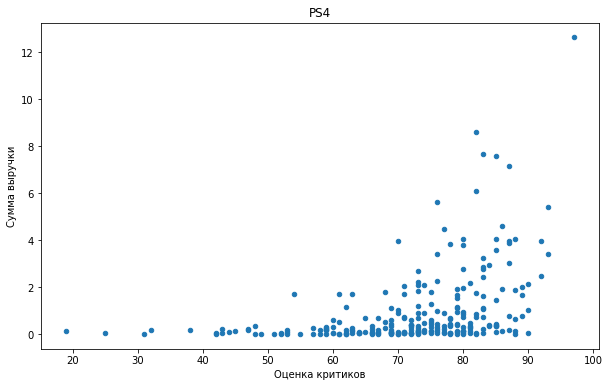

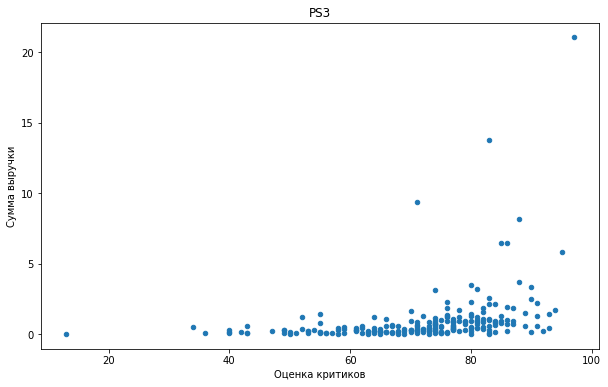

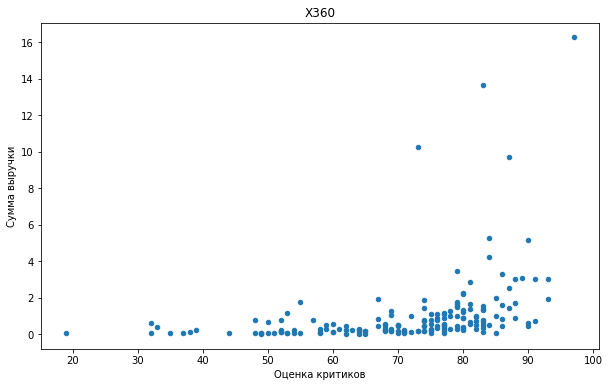

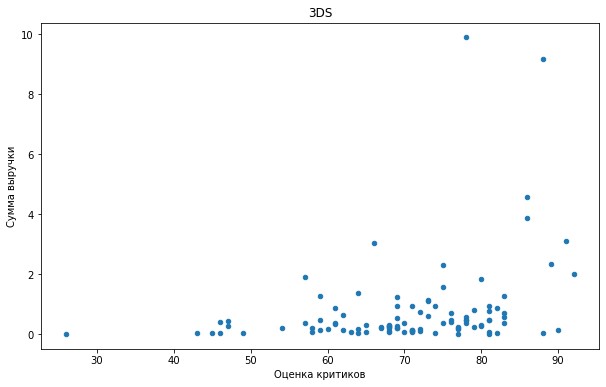

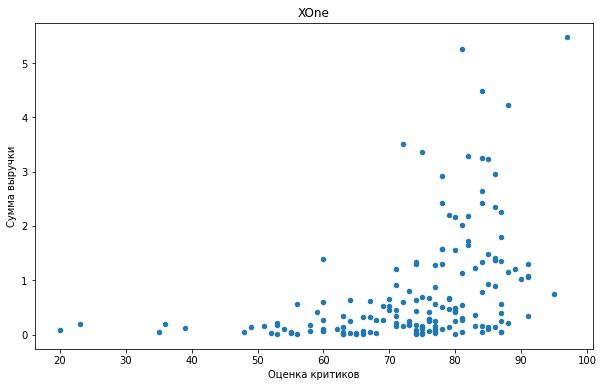

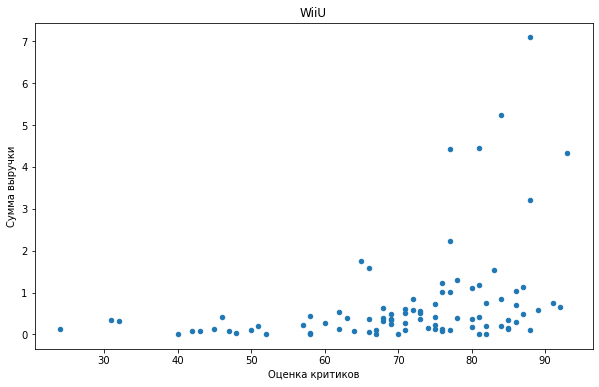

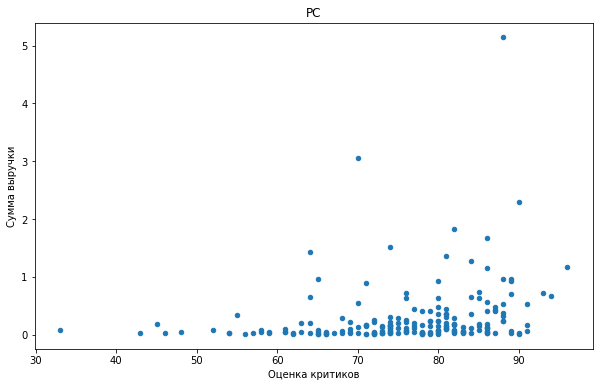

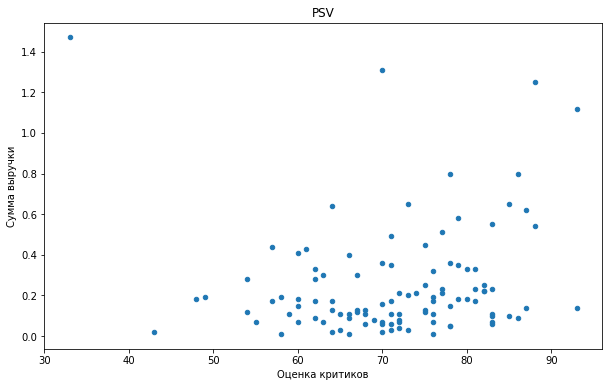

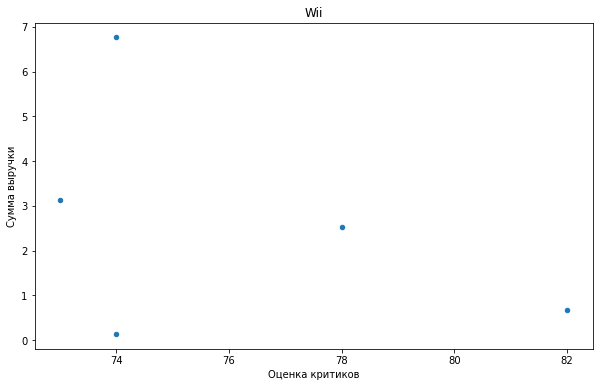

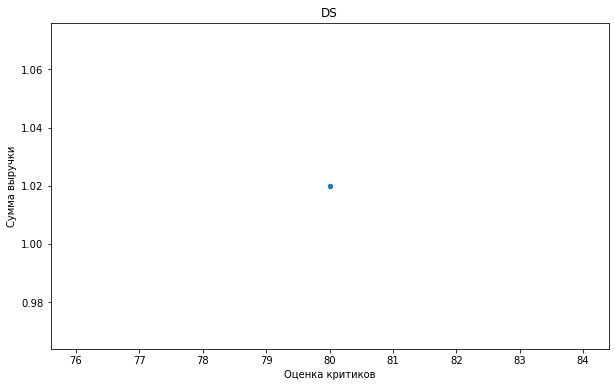

In [33]:
# диаграмма рассеяния по оценке критиков
for platform in top_platforms:
    games_top_platforms.query('platform == @platform').plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 6))
    plt.title(platform)
    plt.ylabel('Сумма выручки')
    plt.xlabel('Оценка критиков');
    

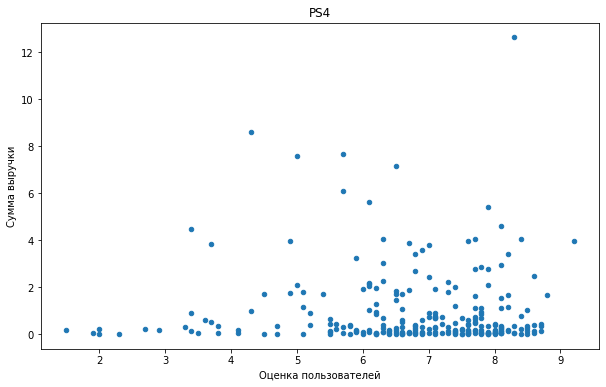

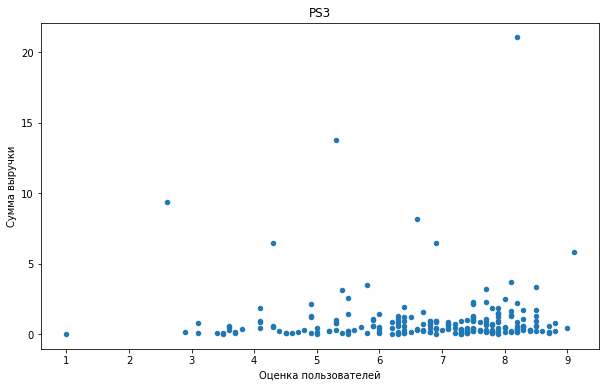

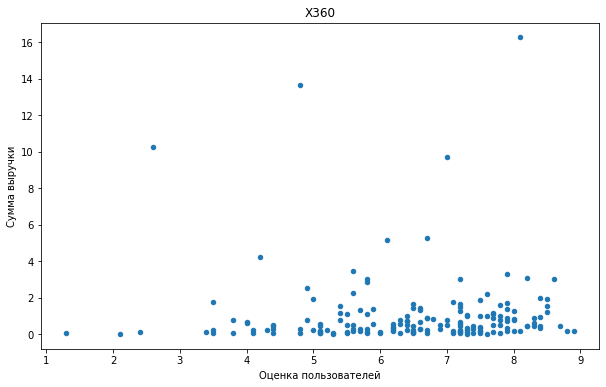

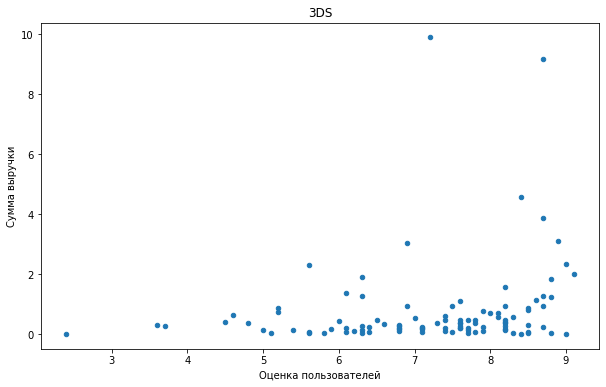

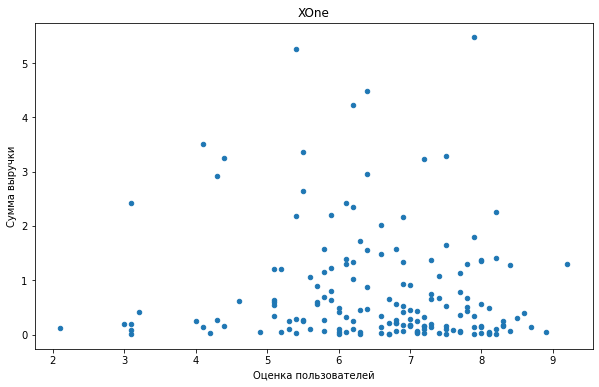

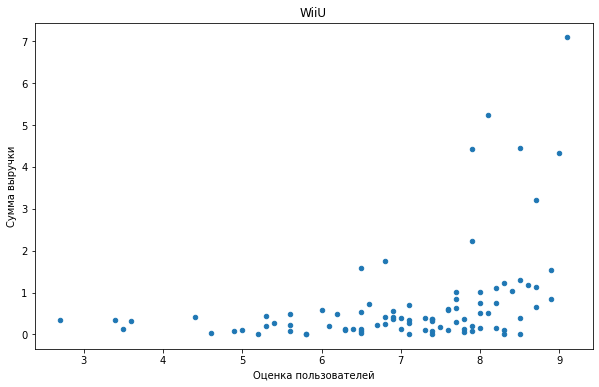

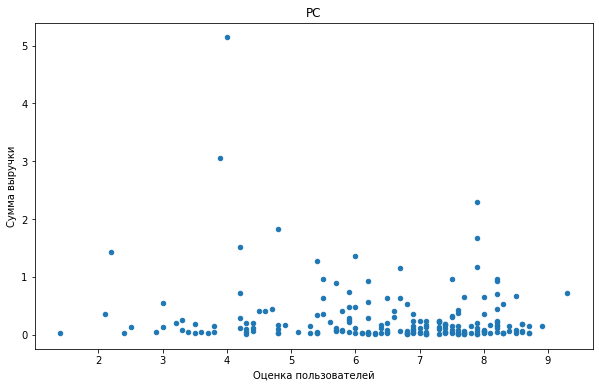

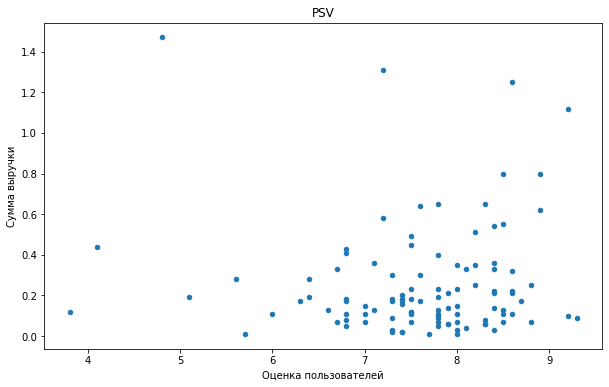

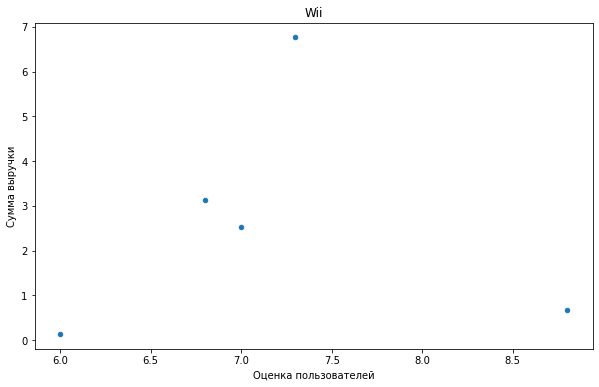

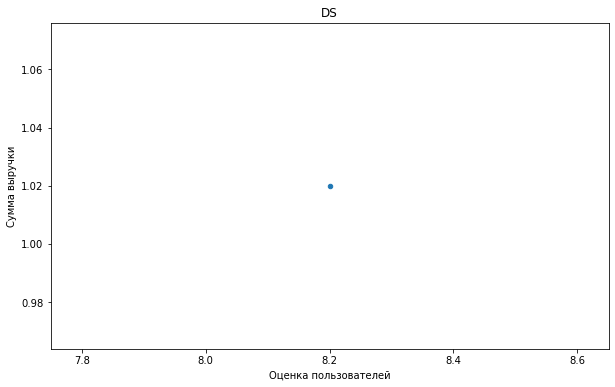

In [34]:
# диаграмма рассеяния по оценке пользователей
for platform in top_platforms:
    games_top_platforms.query('platform == @platform').plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 6))
    plt.title(platform)
    plt.ylabel('Сумма выручки')
    plt.xlabel('Оценка пользователей');
    

In [35]:
for platform in top_platforms:
    games_corr = games_top_platforms.query('platform == @platform')
    print(platform)
    print('оценка критика/выручка', games_corr['total_sales'].corr(games_corr['critic_score']))
    print('оценка пользователя/выручка', games_corr['total_sales'].corr(games_corr['user_score']))   
    print()

PS4
оценка критика/выручка 0.40589480145836687
оценка пользователя/выручка -0.03362497596528878

PS3
оценка критика/выручка 0.3310566175801407
оценка пользователя/выручка 0.0032274054930356904

X360
оценка критика/выручка 0.36057348885073365
оценка пользователя/выручка -0.0020140394826897853

3DS
оценка критика/выручка 0.31055301915326294
оценка пользователя/выручка 0.2018125500765528

XOne
оценка критика/выручка 0.4104220356129637
оценка пользователя/выручка -0.09400318326920852

WiiU
оценка критика/выручка 0.35088242248864304
оценка пользователя/выручка 0.3918479505297129

PC
оценка критика/выручка 0.2360077361879236
оценка пользователя/выручка -0.1369335107338787

PSV
оценка критика/выручка 0.0939880410094661
оценка пользователя/выручка 0.013902409906331152

Wii
оценка критика/выручка -0.4243413011077495
оценка пользователя/выручка 0.009755531330354733

DS
оценка критика/выручка nan
оценка пользователя/выручка nan



/Users/olesya/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/olesya/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Глядя на графики и корреляции, можно сделать вывод, что оценки критиков в большей степени влияют на выручку, чем оценки пользователей. Для таких платформ как Wii, PSP влияние оценки критиков и оценки пользователей на продажи практически одинаково. 

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? 

''

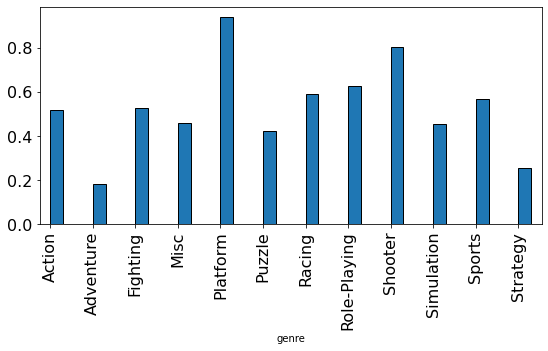

In [36]:
# вывод диаграмм количества и суммы продаж сгруппированных по жанрам
games_filtered = games.groupby('genre').mean()['total_sales'].reset_index().sort_values(by='genre')
games_filtered.plot(x="genre", y="total_sales", kind='bar', ec='black', legend=None, fontsize=16, 
                    figsize=(9,4), width=0.3, position=0)

;

Итак, самые популярные и приносящие больше прибыли игры с жанром Platform и Shooter. Наименее популярны игры с жанром Adventure.

## Составление портрета пользователя каждого региона 

<b> Определите для пользователя каждого региона (NA, EU, JP): 

- Самые популярные платформы (топ-5). Опишите различия в долях продаж. 
</b>

In [37]:
# вывод суммы продаж и доли топ 5 самых продаваемых платформ в регионах NA, EU и JP
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    games_region = games_new.pivot_table(index='platform', values=region, aggfunc='sum')
    games_region['percent_sales, %'] = round((games_region[region] / (games_region[region].sum()) * 100), 1)
    display(games_region.sort_values(by=region, ascending=False).head(5))
    

,na_sales,"percent_sales, %"
platform,,
X360,140.05,23.7
PS4,108.74,18.4
PS3,103.38,17.5
XOne,93.12,15.8
3DS,55.31,9.4


,eu_sales,"percent_sales, %"
platform,,
PS4,141.09,27.8
PS3,106.86,21.1
X360,74.52,14.7
XOne,51.59,10.2
3DS,42.64,8.4


,jp_sales,"percent_sales, %"
platform,,
3DS,87.79,45.6
PS3,35.29,18.3
PSV,21.04,10.9
PS4,15.96,8.3
WiiU,13.01,6.8


В Северной Америке лидируют платформы X360 и Wii, 25% и 20%, соответственно. За ними идут платформы PS3 и DS. PS2 завершает топ 5, хотя доля на их продажу равна чуть меньше 5%.

В Европе 21% приходится на продажу игр на платформе PS3. Далее почти одинаково популярны X360 и Wii. По 9% делят платформы DS и PS4.

В Японии наибольшее предподчтение отдают играм японских платформ. Самые распостраненные платформы DS и 3DS, за ними американские PS3, PSP и Wii.

<b>- Самые популярные жанры (топ-5). Поясните разницу. </b>

In [38]:
# вывод топ 5 самых популярных жанров в регионах NA, EU и JP
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    games_region = games_new.pivot_table(index='genre', values=region, aggfunc='sum')
    games_region['percent_sales, %'] = round((games_region[region] / (games_region[region].sum()) * 100), 1)
    display(games_region.sort_values(by=region, ascending=False).head(5))
    

,na_sales,"percent_sales, %"
genre,,
Action,177.84,30.1
Shooter,144.77,24.5
Sports,81.53,13.8
Role-Playing,64.00,10.8
Misc,38.19,6.5


,eu_sales,"percent_sales, %"
genre,,
Action,159.34,31.4
Shooter,113.47,22.4
Sports,69.09,13.6
Role-Playing,48.53,9.6
Racing,27.29,5.4


,jp_sales,"percent_sales, %"
genre,,
Role-Playing,65.44,34.0
Action,52.80,27.4
Misc,12.86,6.7
Simulation,10.41,5.4
Fighting,9.44,4.9


Интересы по жанрам у Северной Америки и Европы схожи. Самые популярные экшены, спортивные игры и шутеры. 

В Японии интересы отличаются. Ролевые игры лидируют с большим отрывом в 30% от всех продаж. За ними экшены. Наименее интересны спортивные игры и игры на платформах.

<b>- Влияет ли рейтинг ESRB на продажи в отдельном регионе? </b>

In [39]:
# вывод топ 5 рейтингов продаваемых игр в регионах NA, EU и JP
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    games_region = games_new.pivot_table(index='rating', values=region, aggfunc='sum')
    games_region['percent_sales, %'] = round((games_region[region] / (games_region[region].sum()) * 100), 1)
    display(games_region.sort_values(by=region, ascending=False).head(5))


,na_sales,"percent_sales, %"
rating,,
M,231.57,47.5
E,114.37,23.5
E10+,75.70,15.5
T,66.02,13.5


,eu_sales,"percent_sales, %"
rating,,
M,193.96,46.7
E,113.03,27.2
E10+,55.37,13.3
T,52.96,12.8


,jp_sales,"percent_sales, %"
rating,,
E,28.33,33.8
T,26.02,31.1
M,21.20,25.3
E10+,8.19,9.8


В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом E (для всех) и M (для взрослых), чуть меньше с рейтингом Т и Е10+ (подростки).

В Японии почти половина продаж игр с рейтингом Е (для всех), а на втором месте - игры для подростков. В Японии в игры играют с детства.

## Проверка гипотез

### 1. Средние пользовательские рейтинги платформ XOne и PC одинаковые

Сформулируем нулевую (Н₀) и альтернативную (H₁) гипотезы. Совокупности не зависят друг от друга.

- H₀ - средние пользовательские рейтинги XOne и PC не отличаются
- H₁ - средние пользовательские рейтинги XOne и PC отличаются

In [40]:
# Создание двух талиц с фильтром по платформе
xone = games_new[(games_new['user_score'] > 0) & (games_new['platform'] == "XOne")]
pc = games_new[(games_new['user_score'] > 0) & (games_new['platform'] == "PC")]

In [41]:
# зададим критический уровень статистической значимости
alpha = 0.05

# проверка гипотезы о равенстве двух средних 
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Так как нулевую гипотезу отвергаем, следовательно, мы не можем утверждать, что средние пользовательские рейтинги платформ XOne и PC одинаковые.
Посмотрим средний пользовательский рейтинг по двум платформам.

In [42]:
# Средний пользовательский рейтинг по платформам 
games_of_two_platforms = games_new.query('platform in ("XOne", "PC") & user_score > 0')
rating = games_of_two_platforms.pivot_table(index='platform', values='user_score', aggfunc='mean').round(2)
rating.head()


,user_score
platform,
PC,6.43
XOne,6.52


### 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую (Н₀) и альтернативную (H₁) гипотезы. Совокупности не зависят друг от друга.

- H₀ - средние пользовательские рейтинги жанров Action и Sports не отличается
- H₁ - средние пользовательские рейтинги жанров Action и Sports отличаются

In [43]:
# Создание двух талиц с фильтром по жанрам
action = games_new[(games_new['user_score'] > 0) & (games_new['genre'] == 'Action')]
sports = games_new[(games_new['user_score'] > 0) & (games_new['genre'] == 'Sports')]

In [44]:
# зададим критический уровень статистической значимости
alpha = 0.05

# проверка гипотезы о равенстве среднего рейтинга жанра Action и Sports
results = st.ttest_ind(
    action['user_score'],
    sports['user_score']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
  

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем. Следовательно, можем полагать, что средние пользовательские рейтинги жанров Action и Sports разные. Посмотрим средний пользовательский рейтинг по двум жанрам.

In [45]:
# Средний пользовательский рейтинг жанра Action и Sports
games_of_two_genres = games_new.query('genre in ("Action", "Sports") & user_score > 0')
rating = games_of_two_genres.pivot_table(index='genre', values='user_score', aggfunc='mean').round(2)
rating.head()

,user_score
genre,
Action,6.83
Sports,5.46


<b>Вывод</b>

Проверили две гипотезы и обе отвергли. Всё же разница между пользовательскими рейтингами платформ и жанров есть.

## Общий вывод

<b>По проведенному анализу можем сделать вывод, что самое сильное влияние на итоговую выручку, в большинстве случаев, оказывают оценки критиков. Оценки пользователей этим похвастать не могут. </b>

<b>Также, при планировании рекламных кампаний на 2017 год, стоит обратить особое внимание на продвижение платформ X360, Wii и PS4 (как более новую версию популярной PS3), и в особенности игр в жанрах Action, Sports и Shooter. Но не стоит забывать об особенностях рынка и подстроить рекламу конкретно под него. Потому что на примере Японии мы увидели, как требования потребителей одной страны могут отличаться от предпочтений основной массы пользователей других стран.</b>